# Miniproject (20 points + up to 17 points extra credit)

**Instructions** : This problem has an open-ended component.  You can get full credit by doing the problem set with the *suggested* data set (spotify.csv), but you can get **extra credit** by doing it with a different dataset that you have found on the Internet (for example, on Kaggle.com) and/or doing more analysis than required.  You also have the opportunity to get **additional extra credit applied to your final exam grade** if you are selected to give a lightning talk on **Apr 28** about what you found with this project.  The lightning talk is only possible if you chose your own dataset.

The default dataset, which is not eligible for extra credit, is the file spotify.csv, which originally came from https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset but which you can now find on Blackboard where you found this assignment.  (For a description of what its features mean, see https://developer.spotify.com/documentation/web-api/reference/get-audio-features.)  We'll assume in the instructions that if you're using that dataset, you're trying to predict genre from the other numerical features.

If you choose your own dataset, pick one where you think it would be interesting but feasible to predict some variable in the dataset from the others.  If it needs a lot of "cleaning" to be usable, you will get extra credit, but you could also consider looking at a few datasets and picking one that seems somewhat close to directly usable.  (You do *not* need high accuracy in your classifier to get full or extra credit; problems like predicting stock prices from their histories are inherently harder than classifying country from latitude and longitude, for example.)

a 5 points + 7 points EC) Load the dataset as a DataFrame and prepare it for machine learning.  In the spotify.csv case, we suggest using a sklearn.preprocessing.LabelEncoder to turn the target column into numerical classes; see examples in the documentation (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).  You should also fix any columns that look basically numerical, but for some reason were processed as strings instead; but the suggested dataset doesn't have any of these.

If you are cleaning a novel dataset, you may get extra credit here if it takes more work than the spotify dataset to clean.

Suggested dataset EC:  For the suggested dataset, you will get better results if you limit the target genres to four easily distinguished categories, such as 'acoustic', 'dance', 'grunge', and 'show-tunes'.  You can use .unique() to see all the categories available in this column.  Choosing your own 4 categories from unique() is worth 1 point of extra credit.  Limiting the classes like this is otherwise optional.

In [ ]:
# TODO (may want to break this into several code boxes)
from google.colab import files
uploaded = files.upload()

Saving tariffs.csv to tariffs (1).csv


In [ ]:
# all my imports
import pandas as pd
import numpy as np
import seaborn as sns

To start off with, I chose a dataset about the current tariff situation to analyze the largest factor in the degree to which another country was taxed. This will help us see if President Trump and his administration's motives line up with what the media says. For example, this could help us analyze if it is true that trade deficit is a significant factor in tariff decisions.

Essentially, we are using tariff data from Kaggle to figure out what is most influential in determining the degree to which a country is taxed.

The dataset is from https://www.kaggle.com/datasets/danielcalvoglez/us-tariffs-2025.

In [ ]:
df = pd.read_csv('tariffs.csv', delimiter=';') # from https://www.kaggle.com/datasets/danielcalvoglez/us-tariffs-2025
df

,Country,US 2024 Deficit,US 2024 Exports,US 2024 Imports (Customs Basis),Trump Tariffs Alleged,Trump Response,Population
0,Afghanistan,-11.1,11.4,22.6,49%,25%,41454761.0
1,Albania,13.4,141.7,128.3,10%,10%,2745972.0
2,Algeria,"-1,447.10","1,014.50","2,461.60",59%,29%,46164219.0
3,Andorra,1.5,4.9,3.4,10%,10%,80856.0
4,Angola,"-1,186.90",682.4,"1,869.20",63%,32%,36749906.0
...,...,...,...,...,...,...,...
199,Vietnam,"-123,463.00","13,098.20","136,561.20",90%,45%,100352192.0
200,West Bank Administered by Israel,-2.3,3.7,6,38%,19%,NaN
201,Yemen,125.2,134.1,8.9,10%,10%,39390799.0
202,Zambia,-55.3,113.8,169.1,33%,16%,20723965.0


Based on what I saw on Kaggle, it appeared there was some information missing from the population column. I called df.info() to see if this was true and learn more about the data.

In [ ]:
# based on what I saw on the Kaggle dataset, it appeared the population column was missing
df.info() # we can confirm using pd's df.info() feature
# we can also see that all but pop is read as str

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          204 non-null    object 
 1   US 2024 Deficit                  204 non-null    object 
 2   US 2024 Exports                  204 non-null    object 
 3   US 2024 Imports (Customs Basis)  204 non-null    object 
 4   Trump Tariffs Alleged            204 non-null    object 
 5   Trump Response                   204 non-null    object 
 6   Population                       172 non-null    float64
dtypes: float64(1), object(6)
memory usage: 11.3+ KB


I found that not only did the population column have missing values, but all the other columns that should have been numerical, such as the amount of US Trade Deficit or the percentage of tariffs applied, were actually strings!
First, I decided to address the non-percentage columns that should have been numerical. I ran into some issues while doing this, and ended up cleaning the data by first removing the commas in string values and THEN converting the values to floats in the columns.

In [ ]:
# comma remover
def comma_remover(string):
  non_comma = ""
  for letter in string:
    if letter != ',':
      non_comma += letter
  return non_comma

# test
comma_remover('-1,447.10')

'-1447.10'

In [ ]:
# convert to float
# remove commas
str_cols = ['US 2024 Deficit', 'US 2024 Exports', 'US 2024 Imports (Customs Basis)']
for col in str_cols:
  df[col] = df[col].apply(comma_remover).apply(lambda x: float(x))


In [ ]:
df.info() # checking to make sure properly converted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          204 non-null    object 
 1   US 2024 Deficit                  204 non-null    float64
 2   US 2024 Exports                  204 non-null    float64
 3   US 2024 Imports (Customs Basis)  204 non-null    float64
 4   Trump Tariffs Alleged            204 non-null    object 
 5   Trump Response                   204 non-null    object 
 6   Population                       172 non-null    float64
dtypes: float64(4), object(3)
memory usage: 11.3+ KB


I then addressed the strings percentage columns by removing the last character, the percent sign, and then converting the remaining number to a float.

In [ ]:
# fixing percents
percs_cols = ['Trump Tariffs Alleged', 'Trump Response']
for col in percs_cols:
  df[col] = df[col].apply(lambda x: float(x[:-1]))

In [ ]:
df # checking on the dataset

,Country,US 2024 Deficit,US 2024 Exports,US 2024 Imports (Customs Basis),Trump Tariffs Alleged,Trump Response,Population
0,Afghanistan,-11.1,11.4,22.6,49.0,25.0,41454761.0
1,Albania,13.4,141.7,128.3,10.0,10.0,2745972.0
2,Algeria,-1447.1,1014.5,2461.6,59.0,29.0,46164219.0
3,Andorra,1.5,4.9,3.4,10.0,10.0,80856.0
4,Angola,-1186.9,682.4,1869.2,63.0,32.0,36749906.0
...,...,...,...,...,...,...,...
199,Vietnam,-123463.0,13098.2,136561.2,90.0,45.0,100352192.0
200,West Bank Administered by Israel,-2.3,3.7,6.0,38.0,19.0,NaN
201,Yemen,125.2,134.1,8.9,10.0,10.0,39390799.0
202,Zambia,-55.3,113.8,169.1,33.0,16.0,20723965.0


In [ ]:
df.info() # checking datatypes and things

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          204 non-null    object 
 1   US 2024 Deficit                  204 non-null    float64
 2   US 2024 Exports                  204 non-null    float64
 3   US 2024 Imports (Customs Basis)  204 non-null    float64
 4   Trump Tariffs Alleged            204 non-null    float64
 5   Trump Response                   204 non-null    float64
 6   Population                       172 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


Finally, I addressed the missing data in the population column by dropping rows that were missing data using pd's df.dropna() method.

Admittedly, this is probably a controversial decision. I understand that this could cause issues with my data's accuracy-- what if all the countries with missing populations had some underlying commonality that caused their tariff rates to be different?

Still, I felt it would be inaccurate to represent these countries by filling in data (such as by inserting the average). Given there was only 32 values, I thought it might be acceptable for the purposes of this assignment to just ignore them.

Please note that if I were performing a more scientifically rigorous study and if I was on less of a time crunch, I would not just ignore 15% of my data like this.

In [ ]:
# for the sake of simplicity and time, ignoring the 32 countries that we don't know the population of
df.dropna(inplace=True)

In [ ]:
df

,Country,US 2024 Deficit,US 2024 Exports,US 2024 Imports (Customs Basis),Trump Tariffs Alleged,Trump Response,Population
0,Afghanistan,-11.1,11.4,22.6,49.0,25.0,41454761.0
1,Albania,13.4,141.7,128.3,10.0,10.0,2745972.0
2,Algeria,-1447.1,1014.5,2461.6,59.0,29.0,46164219.0
3,Andorra,1.5,4.9,3.4,10.0,10.0,80856.0
4,Angola,-1186.9,682.4,1869.2,63.0,32.0,36749906.0
...,...,...,...,...,...,...,...
198,Venezuela,-1755.8,4232.0,5987.9,29.0,15.0,28300854.0
199,Vietnam,-123463.0,13098.2,136561.2,90.0,45.0,100352192.0
201,Yemen,125.2,134.1,8.9,10.0,10.0,39390799.0
202,Zambia,-55.3,113.8,169.1,33.0,16.0,20723965.0


In [ ]:
df.info() # we can see that all the colummns have the same non-null count now

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 0 to 203
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          172 non-null    object 
 1   US 2024 Deficit                  172 non-null    float64
 2   US 2024 Exports                  172 non-null    float64
 3   US 2024 Imports (Customs Basis)  172 non-null    float64
 4   Trump Tariffs Alleged            172 non-null    float64
 5   Trump Response                   172 non-null    float64
 6   Population                       172 non-null    float64
dtypes: float64(6), object(1)
memory usage: 10.8+ KB


I then used pandas' df.describe() method to understand the general spread of my data, looking at minimum, maximum, standard deviation, etc.

In [ ]:
df.describe() # finally I can use pd's df.describe() call

,US 2024 Deficit,US 2024 Exports,US 2024 Imports (Customs Basis),Trump Tariffs Alleged,Trump Response,Population
count,172.000000,172.000000,172.000000,172.000000,172.000000,1.720000e+02
mean,-6172.715116,11372.547674,17548.502907,25.151163,15.808140,4.286567e+07
std,34055.410554,48081.681606,76638.207319,24.512328,10.356417,1.602899e+08
min,-295401.600000,0.900000,0.100000,10.000000,10.000000,9.816000e+03
25%,-190.975000,66.900000,22.600000,10.000000,10.000000,8.149932e+05
50%,28.550000,359.550000,216.550000,10.000000,10.000000,6.833880e+06
75%,346.200000,2940.025000,3093.175000,34.500000,17.250000,2.831881e+07
max,21913.500000,370189.200000,605760.400000,99.000000,50.000000,1.438070e+09


After that, I proceeded to look at how many unique values where in "Trump Response", the column that would be what we look to predict. If there are too many unique values in this column, that could make things more difficult for a classfication algorithm, like a Decision Tree, which is used in the Random Forest.

In [ ]:
# I will be predicting Trump's actual tariff response.
df['Trump Response'].nunique() # too many unique values for our classification

35

Given that the "Trump Response" tariffs ranged from 10% to 50% in our remaining data, I thought it would be easiest to classify them into categories based on their value in the tens place. I placed the data into "buckets" this way. This gives us only 5 categories to work with, which is much more reasonable for Random Forests to handle than 35.

In [ ]:
# since I will be predicting Trump's actual response but using classification, we'll place the tariffs into "buckets"
def bucketer(num):
  """since we know min is 10 and max is 50 among remaining data,
  we can look only at the first digit to give us nice little
  "buckets" of data put in 5 groups."""
  """return only the tens place value"""
  """yes, I know this would not work in another situation if "Trump Responses" had a greater range
  that took me into the 100s or below 10."""
  return int(str(num)[0])

In [ ]:
df['Trump Response Buckets'] = df['Trump Response'].apply(bucketer)

I then created a countplot using seaborn to see the distribution of "Trump Response Buckets".

This information is helpful because with machine learning, there is a chance an algorithm could come up with stupid rules with uneven data, such as "always predict 1" and still get high accuracy on training data.

Knowing our data's distribution could help us see why our algorithms might bias towards certain values if these values appear more often than the others.

In our countplot, we see that the data is skewed towards lower numbers. We will have to keep this in mind when seeing the results and predictions of our models.

In [ ]:
# scaling all my independent variable columns so it is nice to ML methods :)
for col in df.drop('Country', axis=1).drop('Trump Response Buckets', axis=1):
  df[col] = df[col] / np.std(df[col])

<Axes: xlabel='count', ylabel='Trump Response Buckets'>

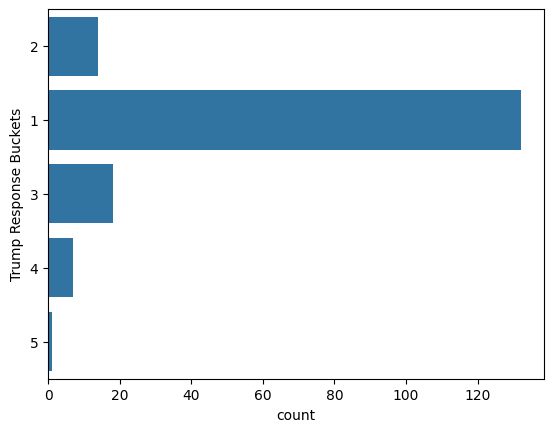

In [ ]:
 # checking distribution of data before I start predicting
# so I know if things look kinda skewed I know why
sns.countplot(df['Trump Response Buckets'].apply(lambda x: str(x)))

After that, I needed to scale the data to make it easier for a machine learning model to digest. This also ensures that large values, like those of the "US 2024 Trade Deficit", aren't weighed drastically more or less than smaller values than those like "Trump Tariffs Alleged."

I scaled the data by dividing every value in the numerical columns for the independent variables by standard deviation of the column.

If you are wondering about the "Trump Response" column-- I left that out so it could be used as a continuous variable to predict in a future linear regression model.

In [ ]:
for col in df.drop('Country',axis=1).drop('Trump Response',axis=1).drop('Trump Response Buckets',axis=1):
  df[col] = df[col] / np.std(df[col])

In [ ]:
df

,Country,US 2024 Deficit,US 2024 Exports,US 2024 Imports (Customs Basis),Trump Tariffs Alleged,Trump Response,Population,Trump Response Buckets
0,Afghanistan,-0.000327,0.000238,0.000296,2.004831,25.0,0.259379,2
1,Albania,0.000395,0.002956,0.001679,0.409149,10.0,0.017181,1
2,Algeria,-0.042617,0.021161,0.032214,2.413980,29.0,0.288845,2
3,Andorra,0.000044,0.000102,0.000044,0.409149,10.0,0.000506,1
4,Angola,-0.034954,0.014234,0.024461,2.577639,32.0,0.229941,3
...,...,...,...,...,...,...,...,...
198,Venezuela,-0.051708,0.088274,0.078360,1.186532,15.0,0.177076,1
199,Vietnam,-3.635941,0.273211,1.787097,3.682342,45.0,0.627895,4
201,Yemen,0.003687,0.002797,0.000116,0.409149,10.0,0.246465,1
202,Zambia,-0.001629,0.002374,0.002213,1.350192,16.0,0.129668,1


b, 7 points) Try predicting your target variable using a RandomForestClassifier from scikit-learn, with all the other numerical features in the dataset as your features.  You can create a dataframe that includes just your numeric features with df.select_dtypes(include='number'), and drop your target (to-be-predicted) column from your features if you need to with df = df.drop(columns=['target']).  (The suggested dataset should also drop the first 'Unnamed' column - that row number predicts the genre number pretty well in that dataset!)  Use a train-test split with 10% of the data in the test set, and evaluate the accuracy on the test set.

In [ ]:
# TODO
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# setup
clf = RandomForestClassifier(n_estimators=200,random_state=42)
X = df.select_dtypes(include='number').drop('Trump Response',axis=1).drop('Trump Response Buckets',axis=1)
y = df['Trump Response Buckets']
# splitting data
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.1,random_state=42)
# fitting forest
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
# predicting
clf.score(X_val, y_val)

1.0

NOTE: We have an abnormally high validation accuracy in part due to small sample size, and because, as I said earlier, the trees could get very high accuracy by simply predicting that the tariffs will always fall in bucket 1.

c, 4 points) Choose one argument to RandomForestClassifier besides n_estimators that you vary to try to improve your classifier's accuracy.  (See documentation here:  https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)  Train three different classifiers with different values for this parameter, counting the one you already trained.

In [ ]:
# TODO variation 2
clf2 = RandomForestClassifier(n_estimators=200, min_samples_leaf = 3, random_state=42)
clf2.fit(X_train,y_train)
clf2.score(X_val, y_val)

1.0

In [ ]:
# TODO variation 3
clf3 = RandomForestClassifier(n_estimators=200, min_samples_leaf = 5,random_state=42)
clf3.fit(X_train, y_train)
clf3.score(X_val, y_val)

0.9444444444444444

d, 2 points) Use the *feature_importances_* attribute of the RandomForestClassifier to find the relative importances of all your features in your best model.

In [ ]:
# TODO
clfs = [clf, clf2, clf3]
for forest in clfs:
  print(f"{forest} \n Feature Importances:")
  for i, col in enumerate(X.columns):
    print(f"{col}: {forest.feature_importances_[i]}")
  print('\n')

RandomForestClassifier(n_estimators=200, random_state=42) 
 Feature Importances:
US 2024 Deficit: 0.2049881404927737
US 2024 Exports: 0.08829982995439303
US 2024 Imports (Customs Basis): 0.06539683517503474
Trump Tariffs Alleged: 0.5875277850104099
Population: 0.05378740936738873


RandomForestClassifier(min_samples_leaf=3, n_estimators=200, random_state=42) 
 Feature Importances:
US 2024 Deficit: 0.2233632565040903
US 2024 Exports: 0.07457096711003058
US 2024 Imports (Customs Basis): 0.0601496058565061
Trump Tariffs Alleged: 0.5970678141863832
Population: 0.044848356342989906


RandomForestClassifier(min_samples_leaf=5, n_estimators=200, random_state=42) 
 Feature Importances:
US 2024 Deficit: 0.24014060989911976
US 2024 Exports: 0.0562258621777653
US 2024 Imports (Customs Basis): 0.06264555535445436
Trump Tariffs Alleged: 0.5965537926019602
Population: 0.04443417996670055




In each of these, "US 2024 Deficit" and "Trump Tariffs Alleged" were the best predictors, while all other features were relatively weak.

e, up to 8 points EC) In this step, perform some additional analysis of your choice on your dataset, such as looking at correlations, performing statistical tests, or training a different machine learning classifier or regression.  You could also plot data for credit, using scatter plots, bar charts, or other visualizations.  Choose your methods with an eye toward being interesting for step (f).  This step is extra credit.

Next, I did a linear regression using multiple regression. I modified my "y" dependent variable to be the continuous "Trump Response" instead of the discreet "Trump Respone Buckets".

In [ ]:
X = df.drop('Country', axis=1).drop('Trump Response',axis=1).drop('Trump Response Buckets',axis=1)
y = df['Trump Response']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=42)

In [ ]:
# maybe-TODO anything here:  correlations, statistical tests, other machine learning...
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
print("Coefficients: \n")
for i, col in enumerate(X.columns):
  print(f"{col}: {lr.coef_[i]}")

Coefficients: 

US 2024 Deficit: 122.47193535420375
US 2024 Exports: -173.7233574835139
US 2024 Imports (Customs Basis): 276.14025049634654
Trump Tariffs Alleged: 10.23733923284113
Population: -0.0946219743987804


Based on our linear regression coefficients, US 2024 Deficits, US 2024 Exports, US 2024 Imports, and Trump's Alleged Tariffs all seemed to have an effect on the final "Trump Response" tariff rates, and population had a marginal effect.

Our linear regression tells us that as US Trade Deficit increased and as US Imports increased, "Trump Response" tariff rates increased greatly. Meanwhile, as US Exports increased, the "Trump Response" tariff rates decreased. Trump's alleged tariffs seem to have less of an effect. As population increases, the tariff rate decreases slightly.

Likely this varies from what our decision trees tell us because linear regression models are particularly prone to outliers, which there may be in the dataset (such as China).

f, 2 points plus shot at lightning talk) Look over your findings from parts (a-e) and summarize anything interesting you learned about the data from doing this study.  The students with the best answers to this question (who also chose to analyze novel datasets) may be selected to give lightning talks for additional extra credit.

**TODO**

Based on our Random Forests' feature importances and our Linear Regression's coefficients, I learned that the US Trade Deficit was very influential in determining the current tariff rate Trump set. Other factors, such as a country's population, were very arbitrary and held little bearing on the amount a country was taxed.

Overall, we can see that one of the largest factor was the US Trade Deficit, both in our Random Forests and in our Linear Regression. As deficit increased, tariff response increased. This supports the argument that Trump is motivated to make the US seem less "indebted" to other countries-- though whether or not Trade Deficit is actually harmful is up for debate.

Our Linear Regression coefficients show that as Exports increased, tariff rates decreased. Meanwhile, as Import increased, tariff rates increased. This supports the argument that Trump follows a mercantilist policy and seeks to have the US less "indebted" to other countries by ensuring that the US puts out more than it takes in. Additionally, we may conclude that Trump's tariffs are likely intended as a protective measure to raise the cost of imports so that US consumers will "buy American" instead. (I could discuss how that's actually a bad idea based on basic economics, but that's not related to our data here.)

Our Decision Trees and Linear Regression gave us conflicting information on the importance of Exports and Imports. Since regression is sensitive to outliers, it is likely that a few outlier countries--perhaps China-- are causing this discrepancy. The fact that there are extreme outliers highlights how different countries are treated-- many are treated under a blanket policy of 10% tariff rates, while others of geopolitical significance get radically different and irregular treatment.